In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
columns =["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df['STATE'].unique()

for state in states:
        education_df.loc[education_df['STATE'] == state, columns] = education_df.loc[education_df['STATE'] == state, columns].interpolate()
        
education_df.dropna(inplace=True)

In [5]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


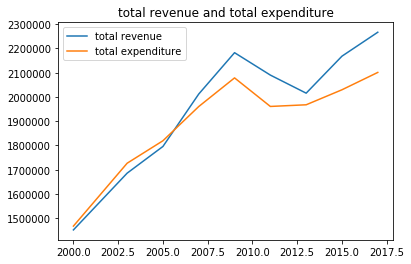

In [9]:
plt.plot(education_df.loc[education_df.STATE == "IDAHO", "YEAR"],
         education_df.loc[education_df.STATE == "IDAHO", "TOTAL_REVENUE"], label="total revenue")

plt.plot(education_df.loc[education_df.STATE == "IDAHO", "YEAR"],
         education_df.loc[education_df.STATE == "IDAHO", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

The recession hit in 2009 which caused spending to decrease

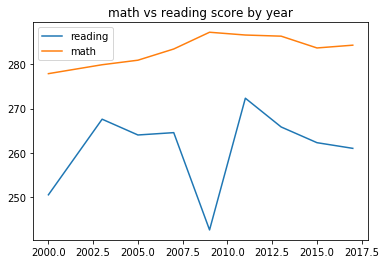

In [12]:
plt.plot(education_df.loc[education_df.STATE == "IDAHO", "YEAR"],
         education_df.loc[education_df.STATE == "IDAHO", "AVG_READING_8_SCORE"], label="reading")

plt.plot(education_df.loc[education_df.STATE == "IDAHO", "YEAR"],
         education_df.loc[education_df.STATE == "IDAHO", "AVG_MATH_8_SCORE"], label="math")

plt.title("math vs reading score by year")
plt.legend()
plt.show()

Math was much higher than reading in my state.

Text(0.5,0,'Score')

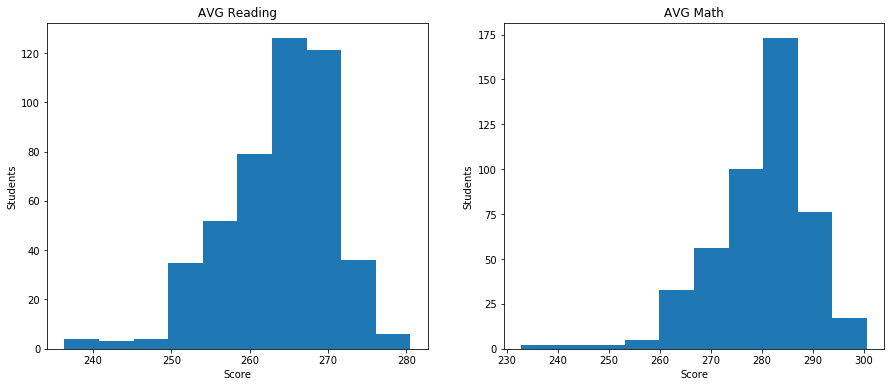

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(education_df["AVG_READING_8_SCORE"].dropna())
plt.title('AVG Reading')
plt.ylabel('Students')
plt.xlabel('Score')

plt.subplot(1,2,2)
plt.hist(education_df["AVG_MATH_8_SCORE"].dropna())
plt.title('AVG Math')
plt.ylabel('Students')
plt.xlabel('Score')

Distributions for math and reading appear to follow a normal distribution.

In [24]:

mean_reading = education_df["AVG_READING_8_SCORE"].fillna(education_df["AVG_READING_8_SCORE"].mean(),inplace=True)

Text(0.5,0,'Score')

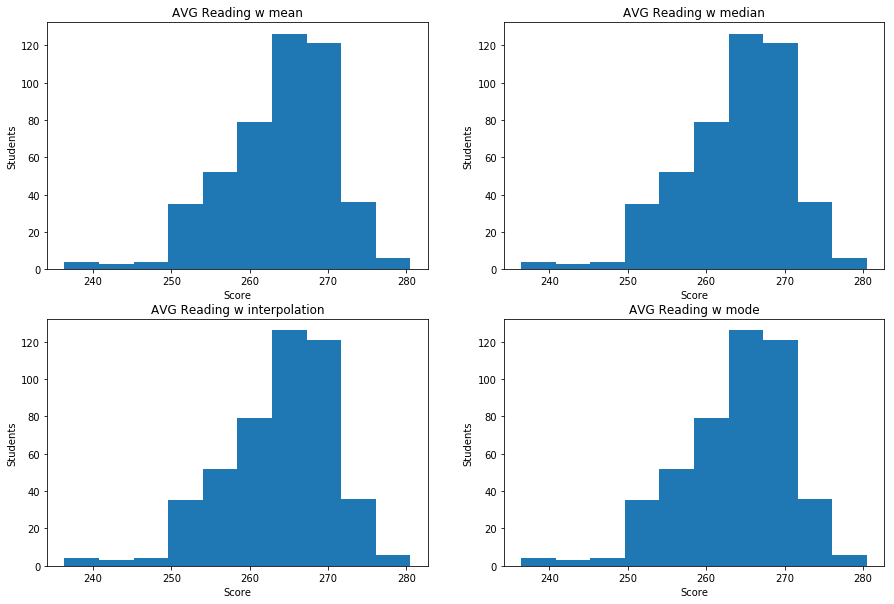

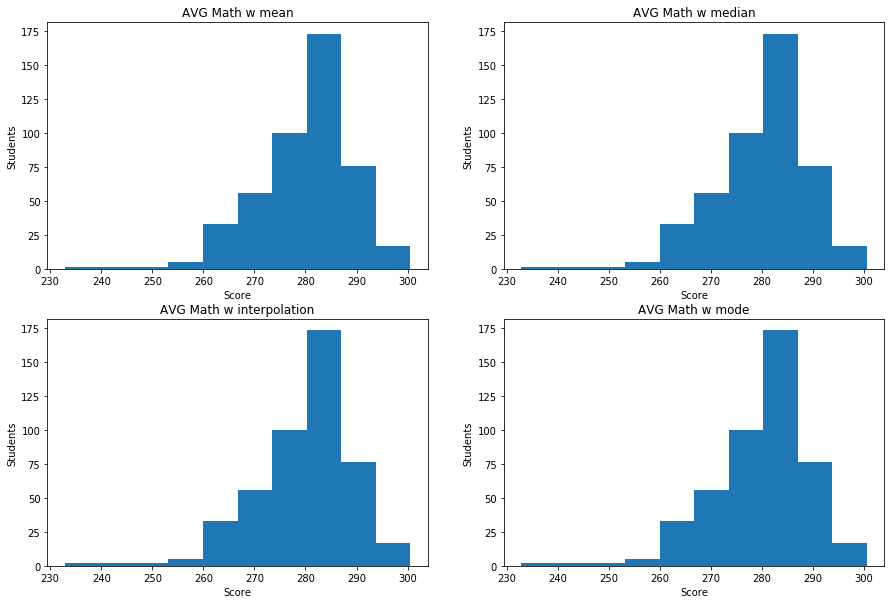

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(education_df["AVG_READING_8_SCORE"].fillna(education_df["AVG_READING_8_SCORE"].mean()))
plt.title('AVG Reading w mean')
plt.ylabel('Students')
plt.xlabel('Score')
plt.subplot(2,2,2)
plt.hist(education_df["AVG_READING_8_SCORE"].fillna(education_df["AVG_READING_8_SCORE"].median()))
plt.title('AVG Reading w median')
plt.ylabel('Students')
plt.xlabel('Score')
plt.subplot(2,2,3)
plt.hist(education_df["AVG_READING_8_SCORE"].fillna(education_df["AVG_READING_8_SCORE"].interpolate()))
plt.title('AVG Reading w interpolation')
plt.ylabel('Students')
plt.xlabel('Score')
plt.subplot(2,2,4)
plt.hist(education_df["AVG_READING_8_SCORE"].fillna(education_df["AVG_READING_8_SCORE"].mode()))
plt.title('AVG Reading w mode')
plt.ylabel('Students')
plt.xlabel('Score')

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(education_df["AVG_MATH_8_SCORE"].fillna(education_df["AVG_MATH_8_SCORE"].mean()))
plt.title('AVG Math w mean')
plt.ylabel('Students')
plt.xlabel('Score')
plt.subplot(2,2,2)
plt.hist(education_df["AVG_MATH_8_SCORE"].fillna(education_df["AVG_MATH_8_SCORE"].median()))
plt.title('AVG Math w median')
plt.ylabel('Students')
plt.xlabel('Score')
plt.subplot(2,2,3)
plt.hist(education_df["AVG_MATH_8_SCORE"].fillna(education_df["AVG_MATH_8_SCORE"].interpolate()))
plt.title('AVG Math w interpolation')
plt.ylabel('Students')
plt.xlabel('Score')
plt.subplot(2,2,4)
plt.hist(education_df["AVG_MATH_8_SCORE"].fillna(education_df["AVG_MATH_8_SCORE"].mode()))
plt.title('AVG Math w mode')
plt.ylabel('Students')
plt.xlabel('Score')

Different methods seem to have no effect on the distributions.